In [2]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [3]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/'
ddir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/"

In [17]:
data2024august = ert.load(ddir + '16Aug/k38_old_125cm_flipped.dat')
data2024june = ert.load(dir + 'mehriban/JuliusKunz/Kamik_WS_200V_125cm_topo.Dat')
data2023 = ert.load(dir + 'mehriban/10_Aug_KamikF38/res2dinv_inputs/WS_rec_ele_nogps_noerror.Dat')
#data2024_long = ert.load(dir + 'mehriban/JuliusKunz/Kamik_WS_200V_250cm.Dat')
kamik = [data2023, data2024june, data2024august]

17/09/24 - 14:11:50 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


17/09/24 - 14:11:50 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


In [18]:
def geom_error(data):
    # Set sensor positions
    data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
    data.remove(data['rhoa'] < 0)
    data['k'] = ert.createGeometricFactors(data, numerical=True)
    mgr = ert.ERTManager(sr=False)
    k0 = ert.createGeometricFactors(data)
    ert.showData(data, vals=k0/data['k'], label='Topography effect')
    data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
    data.remove(data['err'] > 0.06)
    #ert.show(data, data['err'])


    return data, mgr, k0


17/09/24 - 14:11:56 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.0s x 10): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4689275389407960890
17/09/24 - 14:11:56 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 10): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3889001727576556430
17/09/24 - 14:11:56 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.5s x 9): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6355036130734590639
17/09/24 - 14:11:56 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 9): C:\Users\mealiy001\AppData\Roaming\

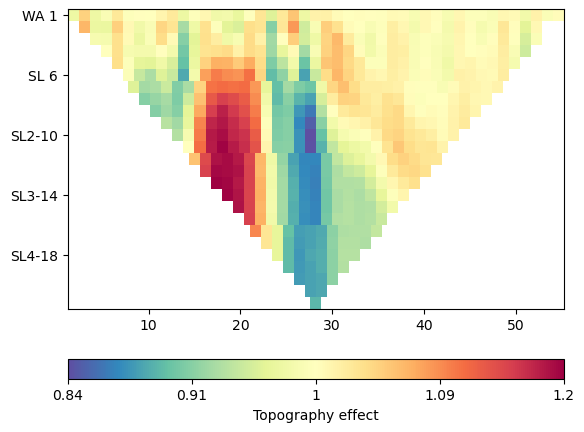

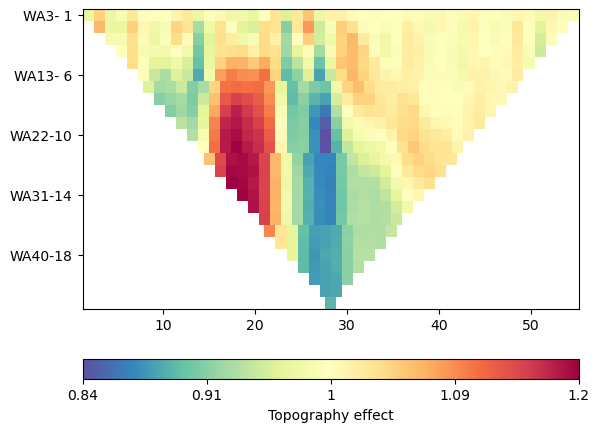

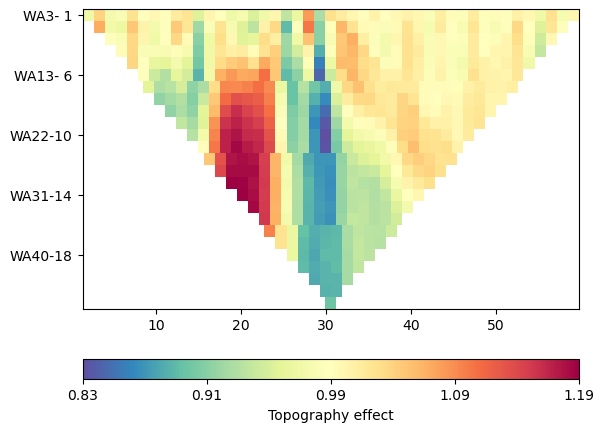

In [19]:

geom_error(kamik[0])
geom_error(kamik[1])


kamik[2].remove(kamik[2]['rhoa'] < 0)
kamik[2]['k'] = ert.createGeometricFactors(kamik[2], numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(kamik[2])
ert.showData(kamik[2], vals=k0/kamik[2]['k'], label='Topography effect')
kamik[2]['err'] = ert.estimateError(kamik[2], relativeError=0.03, absoluteUError=5e-5)

#ert.show(kamik[2], kamik[2]['err'])


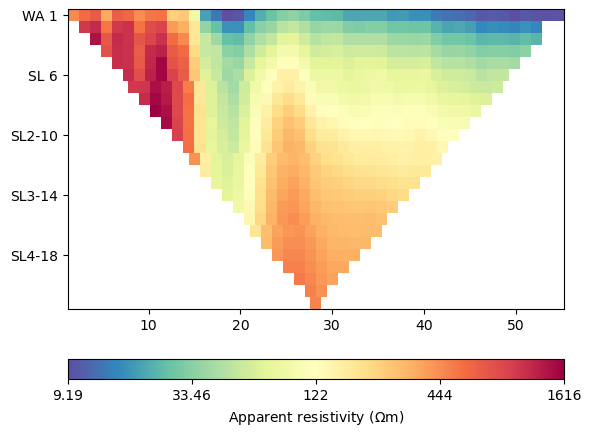

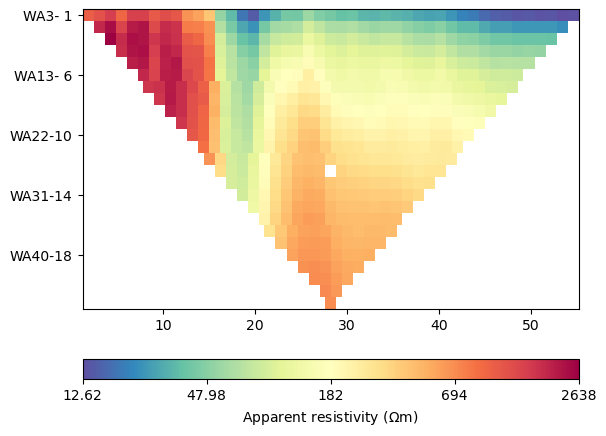

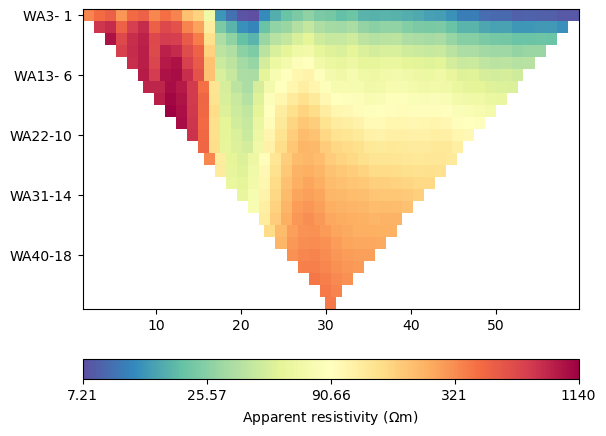

In [20]:
for item in kamik:
    ert.showData(item)

17/09/24 - 14:12:13 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 14:12:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 14:12:13 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 14:12:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 14:12:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/09/24 - 14:12:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/09/24 - 14:12:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2342 Cells: 4340 Boundaries: 3426
17/09/24 - 14:12:13 - pyGIMLi - INFO - Use median(data values)=124.4685
17/09/24 - 14:12:13 - pyGIMLi - INFO - Created startmodel from forward operator: 910, min/max=124.468500/124.468500
17/09/24 - 14:12:13 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027582E437E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027583C70EF0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002758294E880>
min/max (data): 9.19/1616
min/max (error): 3%/3.2%
min/max (start model): 124/124
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1400.61
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  167.10 (dPhi = 87.85%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  102.72 (dPhi = 38.35%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   55.90 (dPhi = 44.70%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.95 (dPhi = 90.27%) lam: 20

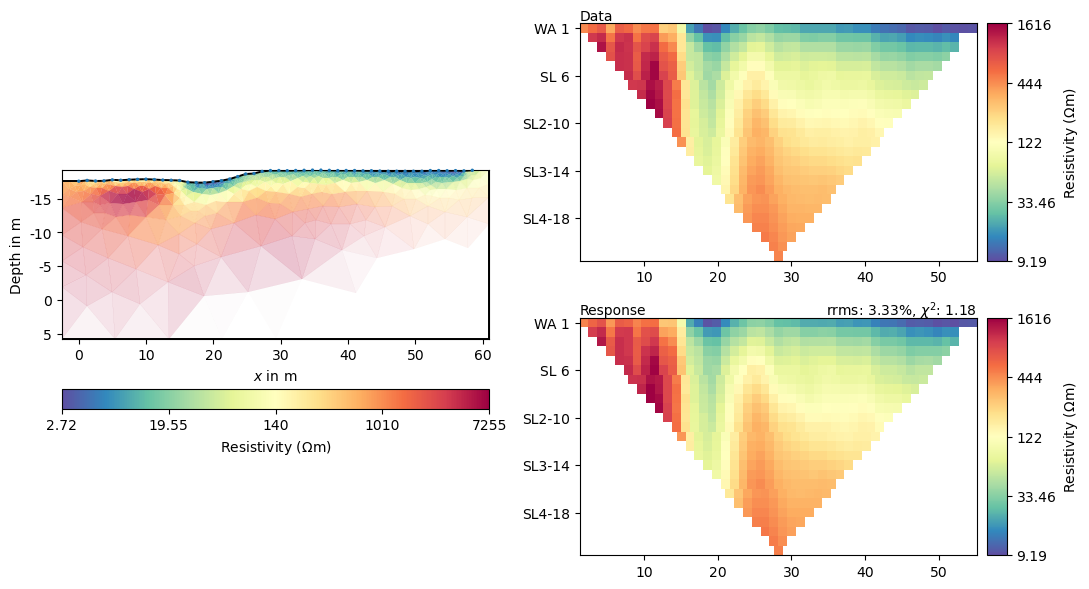

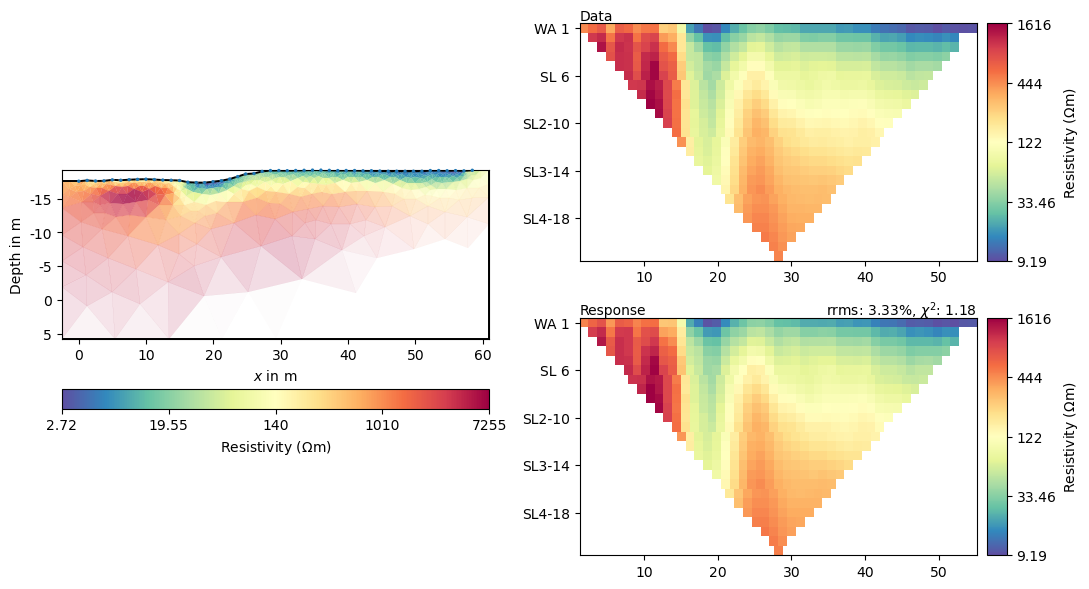

In [21]:
mgr = ert.ERTManager(kamik[0])
mgr.invert(kamik[0], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

17/09/24 - 14:13:48 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2023\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2023\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2023\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

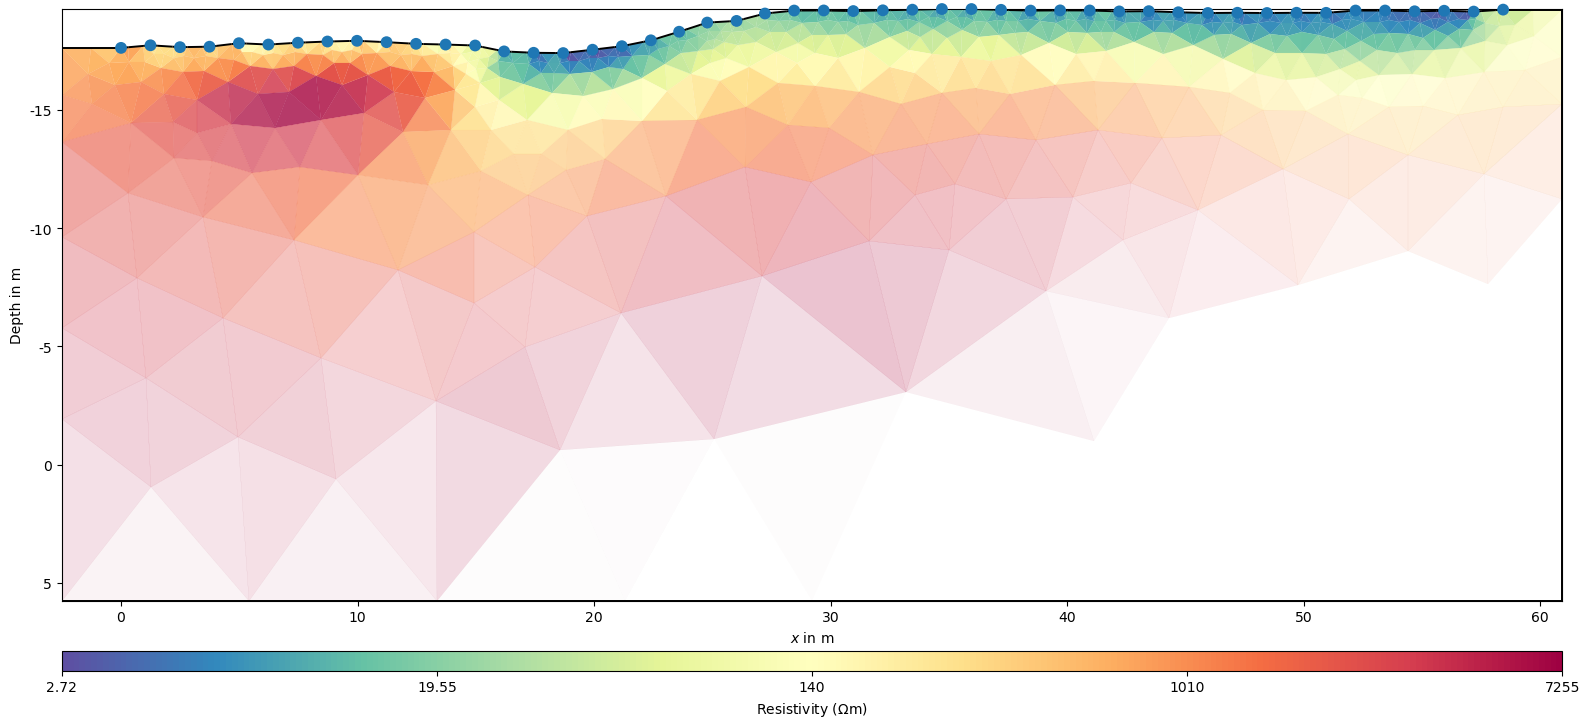

In [22]:
mgr.saveResult(ddir+ 'all_inversions/k38_ws_2023')

17/09/24 - 14:14:01 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 14:14:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 14:14:01 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 14:14:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 14:14:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/09/24 - 14:14:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/09/24 - 14:14:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2342 Cells: 4340 Boundaries: 3426
17/09/24 - 14:14:01 - pyGIMLi - INFO - Use median(data values)=200.375
17/09/24 - 14:14:01 - pyGIMLi - INFO - Created startmodel from forward operator: 910, min/max=200.375000/200.375000
17/09/24 - 14:14:01 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027583EBB7E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000275EC351DF0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002758259ADC0>
min/max (data): 12.62/2638
min/max (error): 3%/3.16%
min/max (start model): 200/200
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1486.96
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  177.37 (dPhi = 87.87%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   99.63 (dPhi = 43.62%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   25.94 (dPhi = 72.09%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.90 (dPhi = 83.70%) lam: 

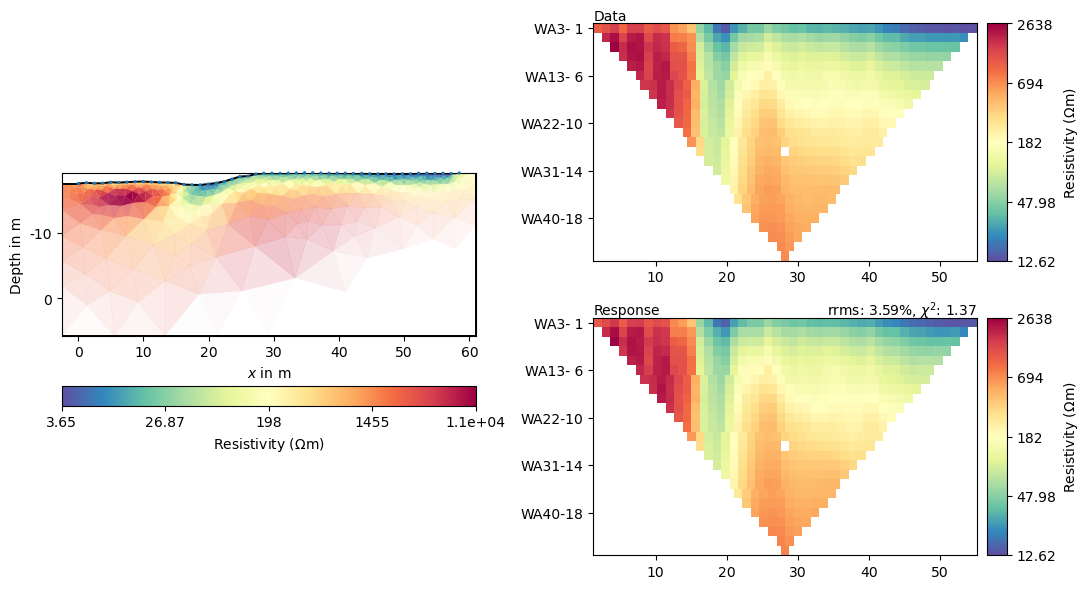

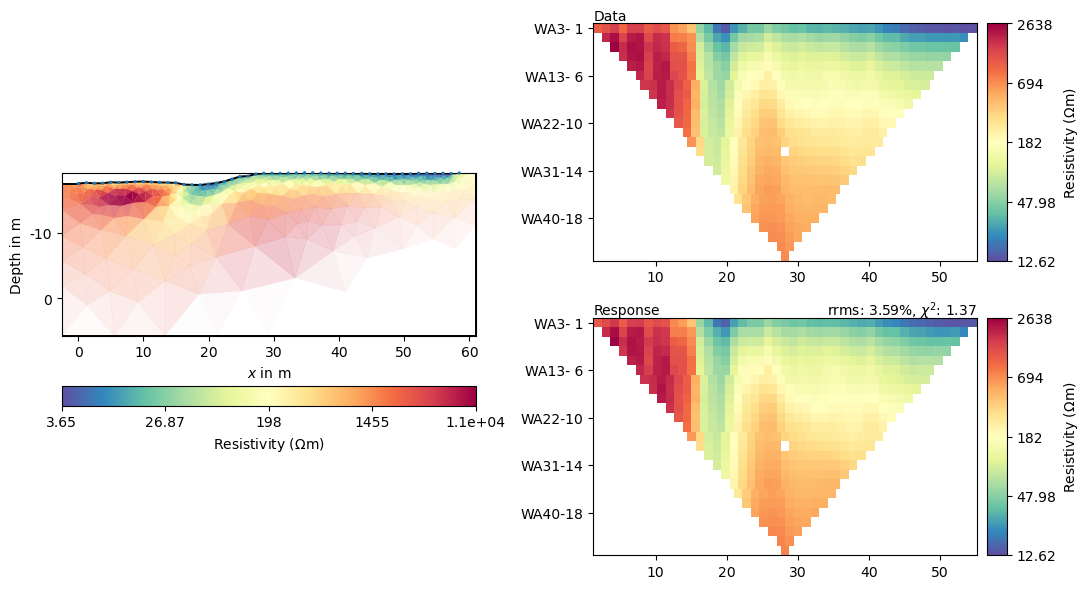

In [23]:
mgr = ert.ERTManager(item)
mgr.invert(kamik[1], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()


17/09/24 - 14:14:42 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024june\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024june\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024june\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

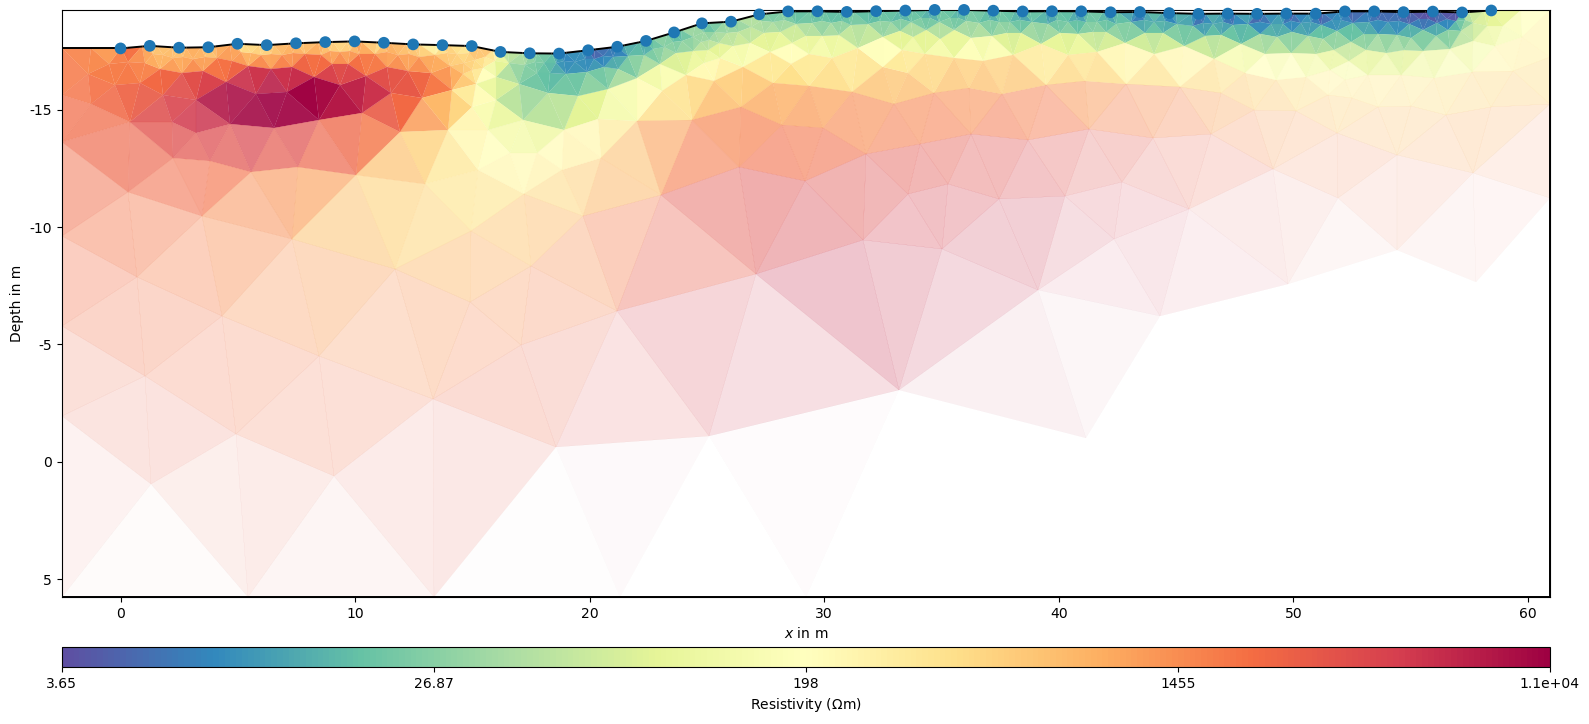

In [24]:
mgr.saveResult(ddir+ 'all_inversions/k38_ws_2024june')

17/09/24 - 14:14:50 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 14:14:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 14:14:50 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 14:14:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 14:14:50 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/09/24 - 14:14:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/09/24 - 14:14:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2393 Cells: 4440 Boundaries: 3502
17/09/24 - 14:14:50 - pyGIMLi - INFO - Use median(data values)=104.305
17/09/24 - 14:14:50 - pyGIMLi - INFO - Created startmodel from forward operator: 901, min/max=104.305000/104.305000
17/09/24 - 14:14:50 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002758266D5D0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027583D9F290>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000027583B7D540>
min/max (data): 7.21/1140
min/max (error): 3%/3.25%
min/max (start model): 104/104
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1328.14
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  162.46 (dPhi = 87.54%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  100.24 (dPhi = 38.12%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   53.81 (dPhi = 45.41%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.91 (dPhi = 89.87%) lam: 2

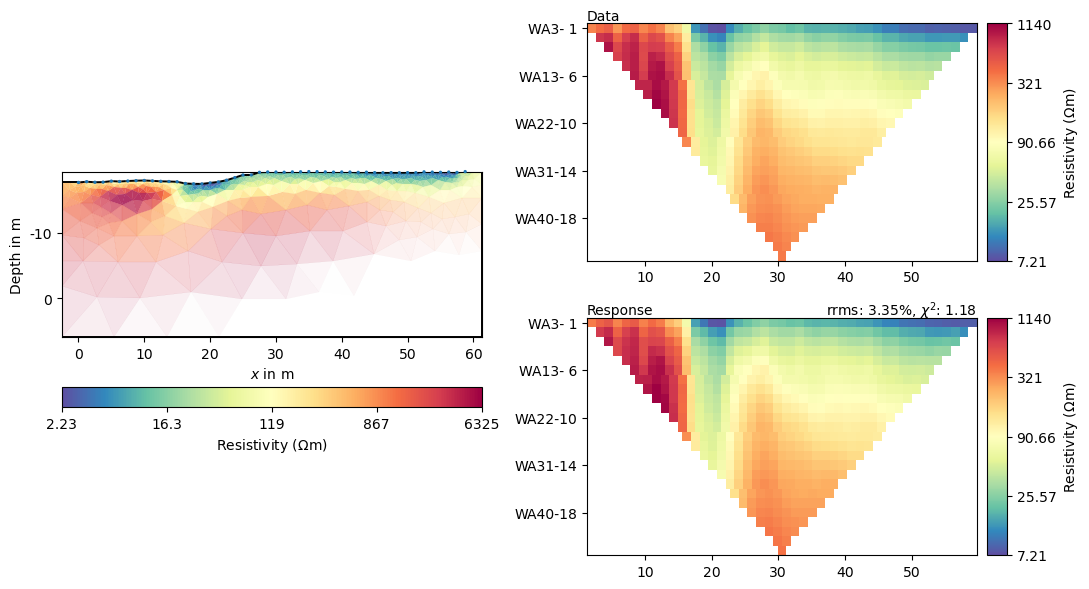

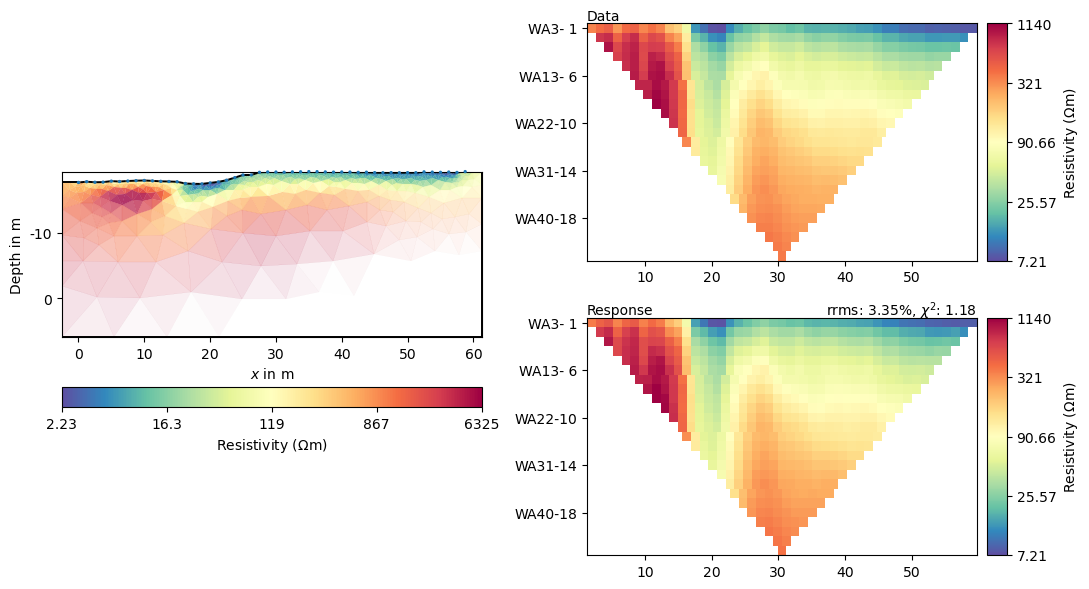

In [25]:
mgr = ert.ERTManager(kamik[2])
mgr.invert(kamik[2], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

17/09/24 - 14:15:49 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024august\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024august\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024august\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

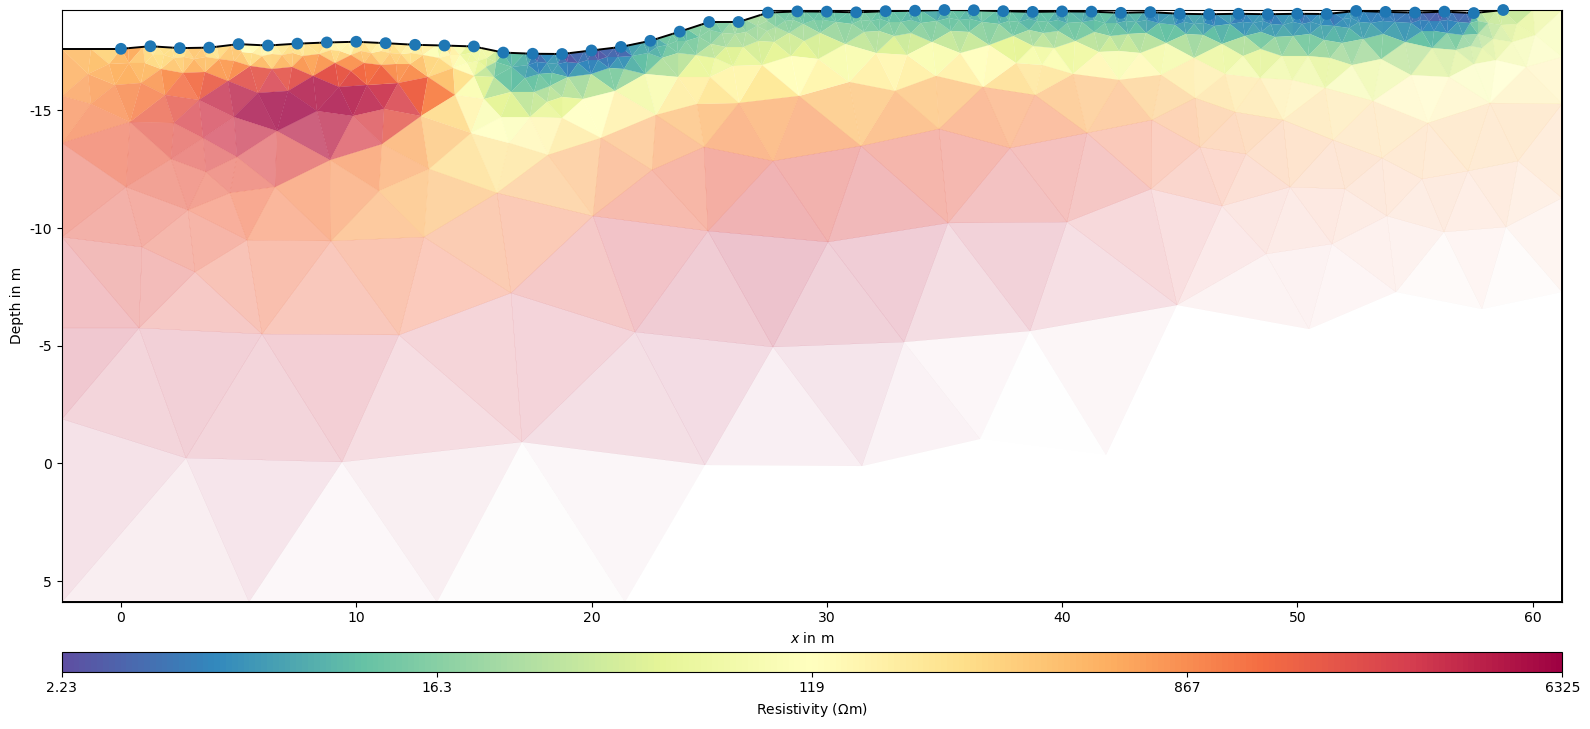

In [26]:
mgr.saveResult(ddir+ 'all_inversions/k38_ws_2024august')

In [27]:
mesh_kamik2023 = pg.load(ddir+'all_inversions/k38_ws_2023/ERTManager/resistivity-pd.bms')
res_kamik2023 = pg.load(ddir+'all_inversions/k38_ws_2023/ERTManager/resistivity.vector')
cov_kamik2023 = pg.load(ddir+'all_inversions/k38_ws_2023/ERTManager/resistivity-cov.vector')

mesh_kamik2024june = pg.load(ddir+'all_inversions/k38_ws_2024june/ERTManager/resistivity-pd.bms')
res_kamik2024june = pg.load(ddir+'all_inversions/k38_ws_2024june/ERTManager/resistivity.vector')
cov_kamik2024june = pg.load(ddir+'all_inversions/k38_ws_2024june/ERTManager/resistivity-cov.vector')

mesh_kamik2024august = pg.load(ddir+'all_inversions/k38_ws_2024august/ERTManager/resistivity-pd.bms')
res_kamik2024august = pg.load(ddir+'all_inversions/k38_ws_2024august/ERTManager/resistivity.vector')
cov_kamik2024august = pg.load(ddir+'all_inversions/k38_ws_2024august/ERTManager/resistivity-cov.vector')

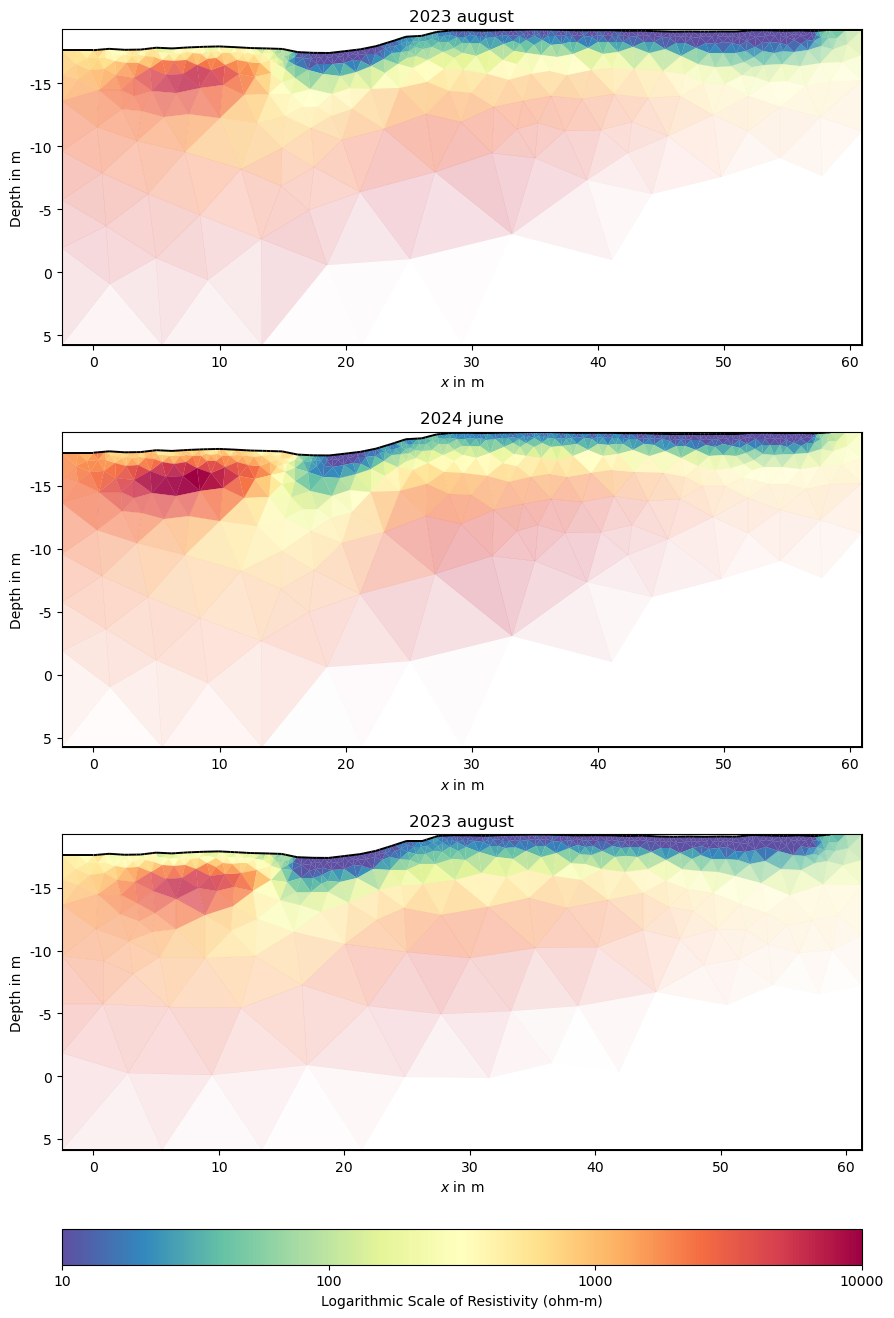

In [29]:
from matplotlib.ticker import LogLocator, LogFormatter



fig, ax = plt.subplots(3, 1, figsize=(10, 18))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

pg.show(mesh_kamik2023, res_kamik2023, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2023, sharex=True)
pg.show(mesh_kamik2024june, res_kamik2024june, logScale=True, cMap="Spectral_r", ax=ax[1], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024june, sharex=True)
pg.show(mesh_kamik2024august, res_kamik2024august, logScale=True, cMap="Spectral_r", ax=ax[2], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024august, sharex=True)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[0].set_title('2023 august')
ax[1].set_title('2024 june')
ax[2].set_title('2023 august')




plt.show()



18/09/24 - 09:35:08 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 14): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6617233901454837329
18/09/24 - 09:35:08 - pyGIMLi - INFO - Found 2 regions.
18/09/24 - 09:35:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
18/09/24 - 09:35:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/09/24 - 09:35:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/09/24 - 09:35:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2121 Cells: 3984 Boundaries: 3116
18/09/24 - 09:35:09 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002760233D580>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002760233E7F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000275E37B7D10>
min/max (data): 9.19/1616
min/max (error): 3%/1.0e+10%
min/max (start model): 100/100
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  789.85
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  109.59 (dPhi = 85.90%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   64.70 (dPhi = 40.86%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.14 (dPhi = 63.23%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.59 (dPhi = 87.85%) lam

18/09/24 - 09:35:35 - pyGIMLi - INFO - Starting inversion.


chi² =    0.96 (dPhi = 24.63%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.96)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002760233D580>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002760233E7F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000275E37B7D10>
min/max (data): 12.62/2638
min/max (error): 3%/1.0e+10%
min/max (start model): 3.18/1.6e+04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  155.99
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   18.47 (dPhi = 87.53%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.10 (

18/09/24 - 09:35:50 - pyGIMLi - INFO - Starting inversion.


chi² =    0.65 (dPhi = 20.83%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.65)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002760233D580>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002760233E7F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000275E37B7840>
min/max (data): 7.21/1140
min/max (error): 3%/1.0e+10%
min/max (start model): 3.18/1.6e+04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   26.31
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.10 (dPhi = 91.63%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.52 (d

<Figure size 500x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

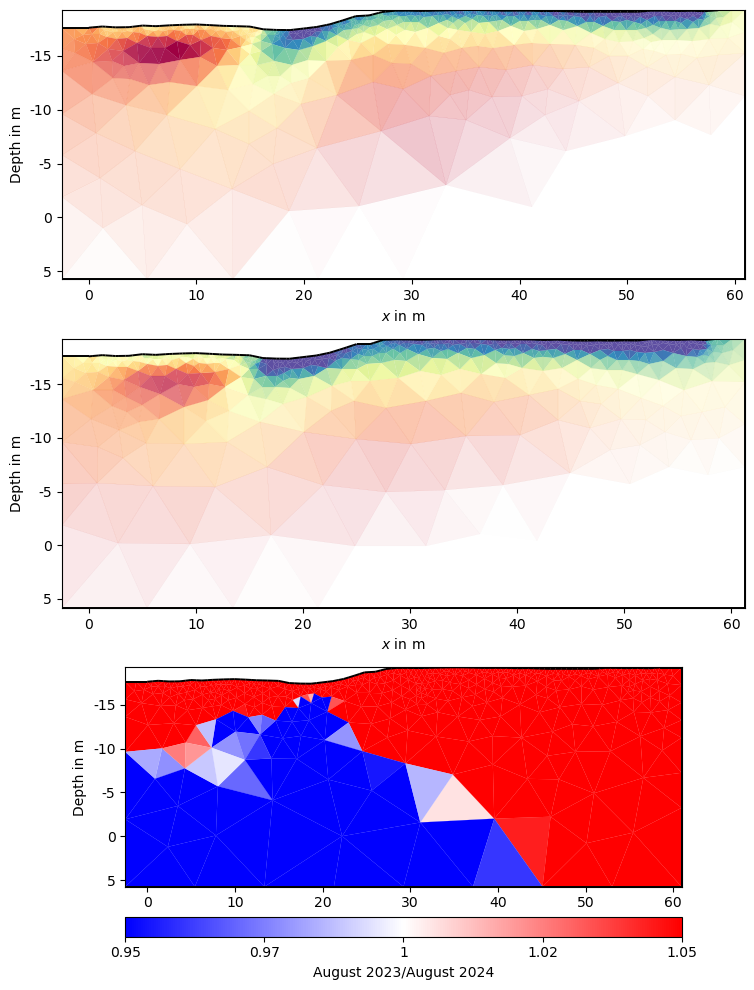

In [48]:
from matplotlib.ticker import LogLocator, LogFormatter



#fig, ax = plt.subplots(3, 1, figsize=(10, 18))  

timeposs=['10/08/2023 12:00','25/06/2024 12:00','16/08/2024 12:00']

dates= [str(datetime.strptime(t, "%d/%m/%Y %H:%M")) for t in timeposs]

timepos= [datetime.fromisoformat(x) for x in dates]

tl = ert.TimelapseERT(kamik, times=timepos)
 
tl.invert(isReference=False, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
tl.generateDataPDF()  # pseudosections
tl.generateModelPDF() # inversions
tl.generateRatioPDF(cMax=1.1)


fig, zx = plt.subplots(3,1,figsize=(10,10) ) 
zx=zx.ravel()
arg= dict( cMap="bwr", cMin=0.95, cMax=1.05, logScale = True) 


pg.show(mesh_kamik2024june, res_kamik2024june, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024june, sharex=True)
pg.show(mesh_kamik2024august, res_kamik2024august, logScale=True, cMap="Spectral_r", ax=zx[1], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024august, sharex=True)
zx[2],col=pg.show(tl.pd,tl.models[1]/tl.models[2], ax=zx[2], pad=0.3, label="August 2023/August 2024", **arg)


#zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
#zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)



plt.show()

